In [2]:
#  1. Import the necessary libraries if you are starting a new notebook. 
#Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.

categorical_df = customer_df.select_dtypes(include = object)
categorical_df.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [4]:
# 3. Check for NaN values.
categorical_df.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [5]:
# 4. Check all unique values of columns.
categorical_df.nunique()

Customer             9134
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

In [6]:
# 5. Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [7]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it.
categorical_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

In [8]:
def cleaning_alpha_numeric(x):
    if '1' in x:
        x = x.replace('1', 'A')
        return x
    elif '2' in x:
        x = x.replace('2', 'B')
        return x
    elif '3' in x:
        x = x.replace('3', 'C')
        return x
    else:
        x = x.replace('4', 'D')
        return x
    

categorical_df['Policy'] = categorical_df['Policy'].apply(cleaning_alpha_numeric)
categorical_df['Policy']

0       Corporate LC
1        Personal LC
2        Personal LC
3       Corporate LB
4        Personal LA
            ...     
9129     Personal LA
9130    Corporate LC
9131    Corporate LB
9132     Personal LB
9133    Corporate LC
Name: Policy, Length: 9134, dtype: object

In [9]:
categorical_df['Renew Offer Type'] =categorical_df['Renew Offer Type'].apply(cleaning_alpha_numeric) 
categorical_df['Renew Offer Type']

0       OfferA
1       OfferC
2       OfferA
3       OfferA
4       OfferA
         ...  
9129    OfferB
9130    OfferA
9131    OfferA
9132    OfferC
9133    OfferD
Name: Renew Offer Type, Length: 9134, dtype: object

In [10]:
display(categorical_df['Policy'].value_counts())
display(categorical_df['Renew Offer Type'].value_counts()) 

Personal LC     3426
Personal LB     2122
Personal LA     1240
Corporate LC    1014
Corporate LB     595
Corporate LA     359
Special LB       164
Special LC       148
Special LA        66
Name: Policy, dtype: int64

OfferA    3752
OfferB    2926
OfferC    1432
OfferD    1024
Name: Renew Offer Type, dtype: int64

In [11]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
categorical_df.columns = categorical_df.columns.str.lower()
categorical_df.columns = categorical_df.columns.str.replace(' ', '_')

In [12]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [13]:
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate LC,OfferA,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal LC,OfferC,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal LC,OfferA,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate LB,OfferA,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal LA,OfferA,Agent,Four-Door Car,Medsize


In [14]:
# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
categorical_df.groupby(['policy_type', 'policy']).agg({'gender': 'count'})

gender
policy_type    policy              
Corporate Auto Corporate LA     359
               Corporate LB     595
               Corporate LC    1014
Personal Auto  Personal LA     1240
               Personal LB     2122
               Personal LC     3426
Special Auto   Special LA        66
               Special LB       164
               Special LC       148

In [15]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? 
#Comment your thoughts and make those changes.

In [16]:
print("customer unique values", categorical_df['customer'].nunique())
print("state unique values", categorical_df['state'].nunique())
print("response unique values", categorical_df['response'].nunique())
print("coverage unique values", categorical_df['coverage'].nunique())
print("education unique values", categorical_df['education'].nunique())
print("effective_to_date unique values", categorical_df['effective_to_date'].nunique())
print("employmentstatus unique values", categorical_df['employmentstatus'].nunique())
print("gender unique values", categorical_df['gender'].nunique())
print("location_code unique values", categorical_df['location_code'].nunique())
print("marital_status unique values", categorical_df['marital_status'].nunique())
print("policy_type unique values", categorical_df['policy_type'].nunique())
print("policy unique values", categorical_df['policy'].nunique())
print("renew_offer_type unique values", categorical_df['renew_offer_type'].nunique())
print("sales_channel unique values", categorical_df['sales_channel'].nunique())
print("vehicle_class unique values", categorical_df['vehicle_class'].nunique())
print("vehicle_size unique values", categorical_df['vehicle_size'].nunique())


customer unique values 9134
state unique values 5
response unique values 2
coverage unique values 3
education unique values 5
effective_to_date unique values 59
employmentstatus unique values 5
gender unique values 2
location_code unique values 3
marital_status unique values 3
policy_type unique values 3
policy unique values 9
renew_offer_type unique values 4
sales_channel unique values 4
vehicle_class unique values 6
vehicle_size unique values 3


In [17]:
# we can differentiate ordinal and nominal values. 

In [18]:
####                       COMPARING REGREASSION MODELS                 #######

In [19]:
# 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns = customer_df.columns.str.lower()
customer_df.dropna(inplace = True)

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


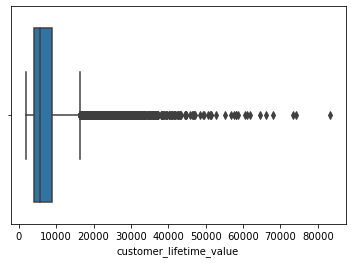

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


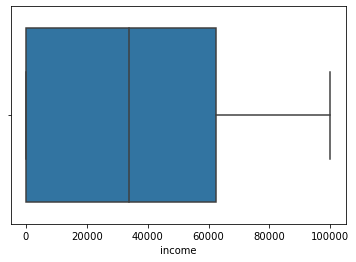

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


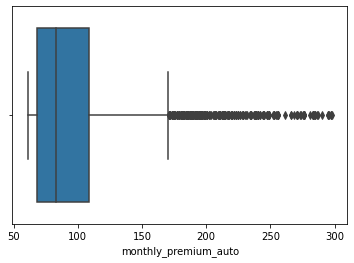

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


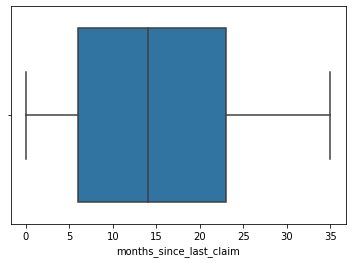

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


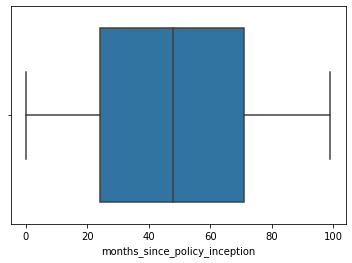

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


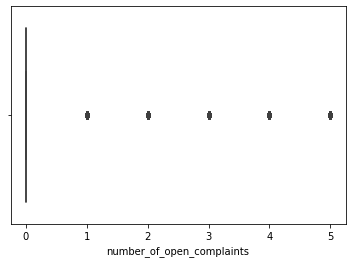

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


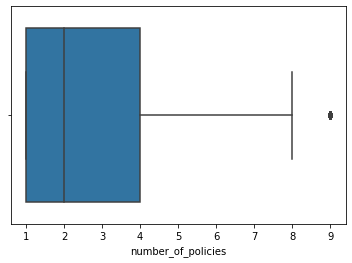

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


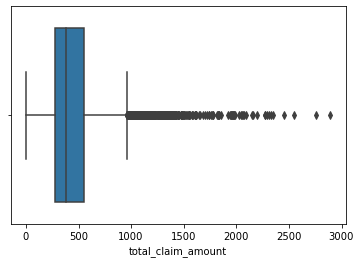

In [20]:
# 2. We will start with removing outliers ...
import seaborn as sns
customer_num = customer_df.select_dtypes(include = np.number)
for i in customer_num:
    sns.boxplot(customer_num[i])
    plt.show()


In [21]:
iqr = np.nanpercentile(customer_df['customer_lifetime_value'], 75) - np.nanpercentile(customer_df['customer_lifetime_value'], 25)
upper_limit = np.nanpercentile(customer_df['customer_lifetime_value'], 75) + 1.5*iqr
lower_limit = np.nanpercentile(customer_df['customer_lifetime_value'], 25) - 1.5*iqr

extra_points_up = customer_df[customer_df['customer_lifetime_value'] > upper_limit]
extra_points_down = customer_df[customer_df['customer_lifetime_value'] > lower_limit]

if len(extra_points_up) <= len(customer_df['customer_lifetime_value']) * 15 /100:
    customer_df = customer_df[customer_df['customer_lifetime_value'] <= upper_limit].copy()
    print('Upper_limit dropped')
else:
    pass
    
if len(extra_points_down) <= len(customer_df['customer_lifetime_value']) * 15 / 100:
    customer_df = customer_df[customer_df['customer_lifetime_value'] >= lower_limit].copy()
    print('Lower_limit dropped')
else:
    pass

Upper_limit dropped


In [22]:
from sklearn.model_selection import train_test_split
X = customer_df.drop(['total_claim_amount'], axis = 1)
y = pd.DataFrame(customer_df['total_claim_amount'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

In [23]:
customer_df['effective_to_date'] = pd.to_datetime(X_train['effective_to_date'])
customer_df['effective_to_date'] = pd.to_datetime(X_test['effective_to_date'])

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = np.object)
X_test_cat = X_test.select_dtypes(include = np.object)

X_train_cat = X_train_cat.drop(['customer'], axis = 1)
X_test_cat = X_test_cat.drop(['customer'], axis = 1)

C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3209433051.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)
C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3209433051.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


In [28]:
#4.  Normalized continuous variables


In [26]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()

X_train_norm = transformer.fit_transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train_num.columns)
X_train_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.039547,0.638721,0.004237,0.742857,0.818182,0.0,0.000
1,0.383127,0.000000,0.033898,0.428571,0.737374,0.0,0.125
2,0.469991,0.837229,0.199153,0.057143,0.727273,0.0,0.750
3,0.361943,0.241286,0.127119,0.685714,0.525253,0.0,0.250
4,0.254585,0.622408,0.038136,0.371429,0.262626,0.0,0.500


In [29]:
transformer = MinMaxScaler()

X_test_norm = transformer.fit_transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test_num.columns)
X_test_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.372422,0.509196,0.143460,0.714286,0.090909,0.2,1.000
1,0.169406,0.382482,0.215190,0.771429,0.181818,0.4,0.000
2,0.255926,0.517712,0.042194,0.371429,0.555556,0.0,0.625
3,0.231020,0.317770,0.021097,0.971429,0.444444,0.0,0.875
4,0.530507,0.814638,0.244726,0.228571,0.868687,0.0,0.750


In [30]:
# 5. Encode the categorical variables

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first')
X_train_cat_hot = X_train_cat[['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                                                        'sales_channel', 'vehicle_class']]
X_train_cat_encoded = encoder.fit_transform(X_train_cat_hot).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
X_train_cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
encoder = OneHotEncoder(drop = 'first')

X_test_cat_hot = X_test_cat[['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                                                        'sales_channel', 'vehicle_class']]
X_test_cat_encoded = encoder.fit_transform(X_test_cat_hot).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())
X_test_cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_train_cat_dummies = X_train_cat[["coverage", "employmentstatus", "location_code", "vehicle_size"]]
X_train_cat_dummies["coverage"] = X_train_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_cat_dummies["employmentstatus"] = X_train_cat["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, 
                                                            "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
X_train_cat_dummies["location_code"] = X_train_cat["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
X_train_cat_dummies["vehicle_size"] = X_train_cat["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3637344196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_dummies["coverage"] = X_train_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3637344196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_dummies["employmentstatus"] = X_train_cat["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1,
C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3637344196.py:5: S

In [33]:
X_test_cat_dummies = X_test_cat[["coverage", "employmentstatus", "location_code", "vehicle_size"]]
X_test_cat_dummies["coverage"] = X_test_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_cat_dummies["employmentstatus"] = X_test_cat["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, 
                                                            "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
X_test_cat_dummies["location_code"] = X_test_cat["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
X_test_cat_dummies["vehicle_size"] = X_test_cat["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})


C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3643100465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_dummies["coverage"] = X_test_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3643100465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_dummies["employmentstatus"] = X_test_cat["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1,
C:\Users\guill\AppData\Local\Temp\ipykernel_7976\3643100465.py:5: Setti

In [34]:
X_train_cat_dummies = pd.DataFrame(X_train_cat_dummies, columns = X_train_cat_dummies.columns)
X_test_cat_dummies = pd.DataFrame(X_test_cat_dummies, columns = X_test_cat_dummies.columns)

X_train_cat_trans = np.concatenate([X_train_cat_encoded, X_train_cat_dummies], axis = 1)
X_test_cat_trans = np.concatenate([X_test_cat_encoded, X_test_cat_dummies], axis = 1)

In [35]:
X_train_treated = np.concatenate([X_train_norm, X_train_cat_trans], axis = 1)
X_test_treated = np.concatenate([X_test_norm, X_test_cat_trans], axis = 1)

In [36]:
X_train_treated = pd.DataFrame(X_train_treated)
X_test_treated = pd.DataFrame(X_test_treated)

In [37]:
# 6. The time variable can be useful. Try to transform its data into a useful one. 
# Hint: Day week and month as integers might be useful


In [38]:
# 7. Since the model will only accept numerical data, check and make sure that every column is numerical, 
# if some are not, change it using encoding.
X_train_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6653 entries, 0 to 6652
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6653 non-null   float64
 1   1       6653 non-null   float64
 2   2       6653 non-null   float64
 3   3       6653 non-null   float64
 4   4       6653 non-null   float64
 5   5       6653 non-null   float64
 6   6       6653 non-null   float64
 7   7       6653 non-null   float64
 8   8       6653 non-null   float64
 9   9       6653 non-null   float64
 10  10      6653 non-null   float64
 11  11      6653 non-null   float64
 12  12      6653 non-null   float64
 13  13      6653 non-null   float64
 14  14      6653 non-null   float64
 15  15      6653 non-null   float64
 16  16      6653 non-null   float64
 17  17      6653 non-null   float64
 18  18      6653 non-null   float64
 19  19      6653 non-null   float64
 20  20      6653 non-null   float64
 21  21      6653 non-null   float64
 22  

In [ ]:
y_train.shape

In [ ]:
# 8. Try a simple linear regression with all the data to see whether we are getting good results

from sklearn import linear_model
from sklearn.metrics import r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train_treated, y_train)

y_pred_train = lm.predict(X_train_treated)
y_pred_test = lm.predict(X_test_treated)

r2_train = r2_score(y_train, y_pred_train)
r2_test= r2_score(y_test, y_pred_test)
print(r2_train, r2_test)

In [ ]:
# 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a 
# lot of them without repeating code

In [1]:
X_train_treated

NameError: name 'X_train_treated' is not defined